# <center style='color:darkseagreen'> Uniform Manifold Approximation and Projection (`UMAP`) </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import umap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load sklearn's `digits` dataset 

In [2]:
digits = datasets.load_digits()
data = digits.data
labels = digits.target

In [3]:
data.shape # (n_samples, n_features)

(1797, 64)

## 3. Create a dataframe

In [4]:
df = pd.DataFrame(data)
df['Labels'] = labels # add labels to the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Labels
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
df.shape

(1797, 65)

## 4. Separate features and labels

In [6]:
features = df.iloc[:, :-1]
classes = df.loc[:, 'Labels']

In [7]:
features.shape # same shape as 'data'

(1797, 64)

## 5. Perform preprocessing

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

## 6. 2-dimensional `UMAP`

In [9]:
umap_2D = umap.UMAP(n_neighbors=5, min_dist=0.35, n_components=2, random_state=0)
reduced_2D = umap_2D.fit_transform(scaled)

In [10]:
reduced_2D.shape # from 64, the features have been reduced to 2

(1797, 2)

In [11]:
reduced_2D[:6]

array([[14.12162   ,  2.1025133 ],
       [-5.012235  ,  8.552376  ],
       [-7.040178  , -0.34754255],
       [ 3.1507864 ,  6.977407  ],
       [ 2.368168  , -6.8132153 ],
       [ 4.6141663 ,  5.7057195 ]], dtype=float32)

In [12]:
np.unique(classes) # check unique digits 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
comp1_2D = reduced_2D[:, 0]
comp2_2D = reduced_2D[:, 1]

In [14]:
color_dict = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm', 5: 'c', 6: 'k', 7: 'coral', 8: 'gray', 9: 'peru'}
label_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
marker_dict = {0: 'o', 1: 'v', 2: '*', 3: '+', 4: 'x', 5: 'd', 6: 's', 7: 'p', 8: '<', 9: '>'}
alpha_dict = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

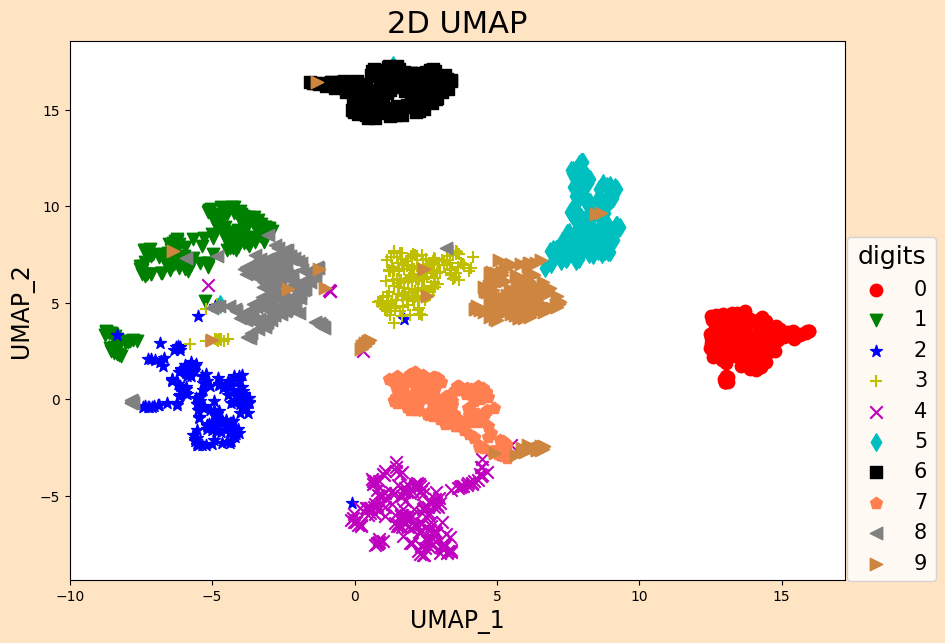

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('bisque')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_2D[j], comp2_2D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i], alpha=alpha_dict[i])

ax.set_xlabel('UMAP_1', fontsize=17)
ax.set_ylabel('UMAP_2', fontsize=17)
ax.set_title('2D UMAP', fontsize=22)
ax.legend(title='digits', bbox_to_anchor=(0.99, 0.656), markerscale=1, fontsize=15, title_fontsize=18);

## 7. 3-dimensional `UMAP`

In [16]:
umap_3D = umap.UMAP(n_neighbors=5, min_dist=0.35, n_components=3, random_state=0)
reduced_3D = umap_3D.fit_transform(scaled)

In [17]:
reduced_3D.shape # from 64, the features have been reduced to 3

(1797, 3)

In [18]:
reduced_3D[:6]

array([[13.277708  ,  2.6056786 ,  5.373114  ],
       [ 3.3494527 ,  1.455211  ,  5.602241  ],
       [-0.03772375,  2.532829  ,  0.5865026 ],
       [-2.5286267 ,  7.786706  ,  8.152437  ],
       [-0.794465  , -4.3595767 ,  8.775288  ],
       [-0.9918172 ,  8.319676  ,  6.624116  ]], dtype=float32)

In [19]:
comp1_3D = reduced_3D[:, 0]
comp2_3D = reduced_3D[:, 1]
comp3_3D = reduced_3D[:, 2]

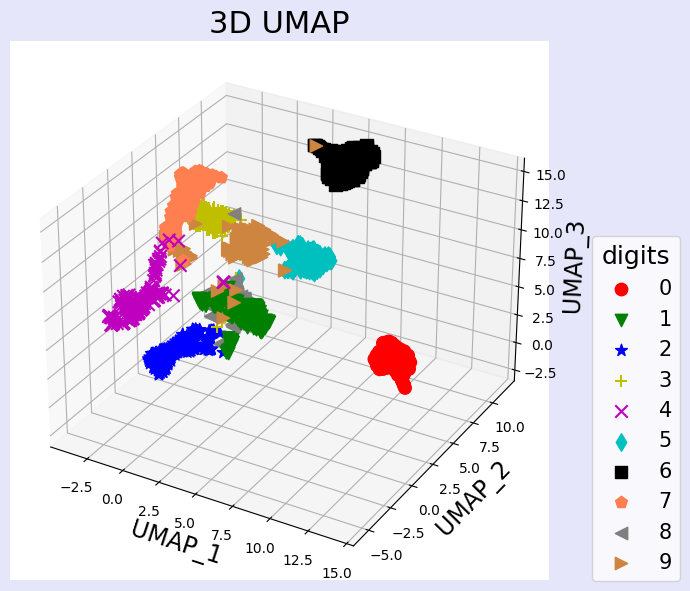

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('lavender')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_3D[j], comp2_3D[j], comp3_3D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i],
               alpha=alpha_dict[i])

ax.set_xlabel('UMAP_1', fontsize=17)
ax.set_ylabel('UMAP_2', fontsize=17)
ax.set_zlabel('UMAP_3', fontsize=17)
ax.set_title('3D UMAP', fontsize=22)
ax.legend(title='digits', bbox_to_anchor=(1.263, 0.657), markerscale=1, fontsize=15, title_fontsize=18);